In [1]:
# For better printing within jupyter cells
import IPython
IPython.core.interactiveshell.InteractiveShell.ast_node_interactivity = "all"

# Basic python libraries
import matplotlib.pyplot as mpl # doc: https://matplotlib.org/tutorials
import numpy                    # doc: https://numpy.org/doc/stable
import sympy                    # doc: https://docs.sympy.org

In [4]:
%%capture
# By these two lines, it will not be needed to restart kernel when applying change in a library
%load_ext autoreload
%autoreload 2

# import main
import dolfin  
import numpy    as np
import sympy    as sp
import matplotlib.pyplot as plt
import math
import gmsh
import meshio
import sys
from numpy import linspace
from sympy import lambdify
import seaborn as sns

import myPythonLibrary as mypy
import dolfin_mech     as dmech
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

from scipy.optimize import fsolve

from matplotlib import cm

import seeds
import geometry


## Parameters

In [5]:
lmbda = sympy.Symbol('lambda') # lambda is a reserved keyword in python, it cannot be used as a name for a variable.
mu    = sympy.Symbol('mu')

print ("lmbda:"); lmbda
print ("mu:"   ); mu

lmbda:


lambda

mu:


mu

Info    : Clearing all models and views...
Info    : Done clearing all models and views
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 122 (Line)
Info    : [ 10%] Meshing curve 123 (Line)
Info    : [ 10%] Meshing curve 124 (Line)
Info    : [ 20%] Meshing curve 148 (Line)
Info    : [ 20%] Meshing curve 149 (Line)
Info    : [ 30%] Meshing curve 150 (Line)
Info    : [ 30%] Meshing curve 151 (Line)
Info    : [ 30%] Meshing curve 152 (Line)
Info    : [ 40%] Meshing curve 153 (Line)
Info    : [ 40%] Meshing curve 154 (Line)
Info    : [ 50%] Meshing curve 155 (Line)
Info    : [ 50%] Meshing curve 156 (Line)
Info    : [ 50%] Meshing curve 157 (Line)
Info    : [ 60%] Meshing curve 158 (Line)
Info    : [ 60%] Meshing curve 159 (Line)
Info    : [ 70%] Meshing curve 160 (Line)
Info    : [ 70%] Meshing curve 161 (Line)
Info    : [ 80%] Meshing curve 162 (Line)
Info    : [ 80%] Meshing curve 163 (Line)
Info    : [ 80%] Meshing curve 164 (Line)
Info    : [ 90%] Meshing curve 165 (Line)
Info  

/Users/tayebi/PhD/Codes/Microporomechanical_modeling/Paper_micro-poro_notebooks/geometry.py:49: RuntimeWarning: divide by zero encountered in double_scalars
  m = (Q[1] - P[1])/(Q[0] - P[0])
/Users/tayebi/PhD/Codes/Microporomechanical_modeling/Paper_micro-poro_notebooks/geometry.py:66: RuntimeWarning: invalid value encountered in double_scalars
  x = (c2 - c1)/(m1 - m2)
/Users/tayebi/PhD/Codes/Microporomechanical_modeling/Paper_micro-poro_notebooks/geometry.py:67: RuntimeWarning: invalid value encountered in double_scalars
  y = (m2*c1 - m1*c2)/(m2 - m1)
/Users/tayebi/PhD/Codes/Microporomechanical_modeling/Paper_micro-poro_notebooks/geometry.py:50: RuntimeWarning: invalid value encountered in double_scalars
  c = P[1] - m * P[0]


Info    : Running '/Users/tayebi/miniconda3/envs/all/bin/gmsh -2 -o Geometries/Hexagon/hexagon_RVE1.msh -format msh22 Geometries/Hexagon/hexagon_RVE1.msh' [Gmsh 4.9.0, 1 node, max. 1 thread]
Info    : Started on Tue Oct 17 20:30:01 2023
Info    : Reading 'Geometries/Hexagon/hexagon_RVE1.msh'...
Info    : 55 entities
Info    : 755 nodes
Info    : 1260 elements
Info    : Done reading 'Geometries/Hexagon/hexagon_RVE1.msh'
Info    : Meshing 1D...
Info    : Done meshing 1D (Wall 5.43329e-05s, CPU 0.000239s)
Info    : Meshing 2D...
Info    : Done meshing 2D (Wall 3.4431e-05s, CPU 0.000154s)
Info    : 767 nodes 1290 elements
Info    : Writing 'Geometries/Hexagon/hexagon_RVE1.msh'...
Info    : Done writing 'Geometries/Hexagon/hexagon_RVE1.msh'
Info    : Stopped on Tue Oct 17 20:30:01 2023 (From start: Wall 0.00951465s, CPU 0.31433s)
Converting from Gmsh format (.msh, .gmsh) to DOLFIN XML format
Expecting 755 vertices
Found all vertices
Expecting 1260 cells
Found all cells
Conversion done
poros

0.7066946514073262

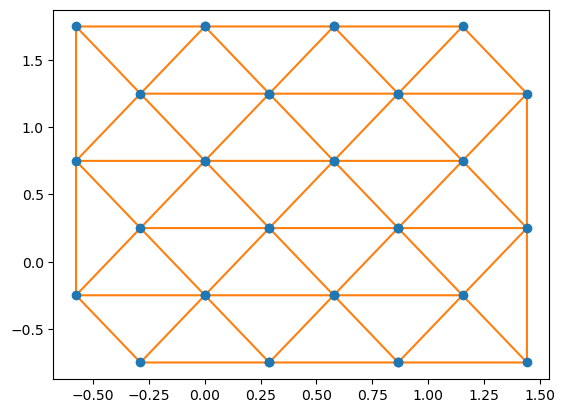

In [6]:
dim = 2
fname = "Geometries/Hexagon/hexagon_RVE1"

domain = 1
row = 1
DoI = 0.0
thickness = 0.092
shift_y = -0.2

seeds.semi_regular(DoI, row, domain)
geometry.voronoi(fname, thickness, row, domain, shift_y, seeds_remove=True)



mesh = dolfin.Mesh()
dolfin.XDMFFile(fname+"-mesh.xdmf").read(mesh)

dV = dolfin.Measure("dx",domain=mesh)
coord = mesh.coordinates()
xmax = max(coord[:,0]); xmin = min(coord[:,0])
ymax = max(coord[:,1]); ymin = min(coord[:,1])

vol = (xmax - xmin)*(ymax - ymin)
bbox = [xmin, xmax, ymin, ymax]


In [7]:
E_     = 1.  # (Pa)
nu_    = 0.49 # ()

mat_params = {"model":"CGNH", "parameters":{"E":E_, "nu":nu_}}
homo = dmech.HomogenizationProblem(dim=dim,
                mesh=mesh,
                mat_params=mat_params["parameters"],
                vol=vol,
                bbox=bbox)
[mu_, lmbda_] = homo.get_lambda_and_mu()

# lmbda_ = E_ * nu_ / (1 + nu_) / (1 - 2 * nu_)
# mu_    = E_ / 2 / (1 + nu_)
print ("lmbda_:"); lmbda_
print ("mu_:"   ); mu_
K_ = lmbda_ + 2*mu_/3
G_ = mu_

Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
lmbda_:


0.015686003186387798

mu_:


0.11582857313994574

In [8]:
subs_dict        = {}
subs_dict[lmbda] = lmbda_
subs_dict[mu]    = mu_
print ("subs_dict:"); subs_dict

print ("lmbda:"); lmbda.subs(subs_dict)
print ("mu:"   ); mu.subs(subs_dict)

subs_dict:


{lambda: 0.015686003186387798, mu: 0.11582857313994574}

lmbda:


0.0156860031863878

mu:


0.115828573139946

## Behavior models

### Kinematics variables

In [9]:
# Cauchy-Green dilatation tensor
C_var = sympy.MatrixSymbol('C', 2, 2).as_explicit()
print ("C_var:"); C_var

C_inv_var = sympy.Inverse(C_var)
print ("C_inv_var:"); C_inv_var.doit()

# Invariants
I_C_var   = sympy.trace(C_var)
III_C_var = sympy.det(C_var)
J_var     = sympy.sqrt(III_C_var)
print (  "I_C:"); I_C_var
print ("III_C:"); III_C_var
print (    "J:"); J_var

# Reduced invariants
I_bar_C_var = sympy.root(J_var, -sympy.Rational(3, 2)) * I_C_var
print ("I_bar_C:"); I_bar_C_var


C_var:


Matrix([
[C[0, 0], C[0, 1]],
[C[1, 0], C[1, 1]]])

C_inv_var:


Matrix([
[ C[1, 1]/(C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0]), -C[0, 1]/(C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0])],
[-C[1, 0]/(C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0]),  C[0, 0]/(C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0])]])

I_C:


C[0, 0] + C[1, 1]

III_C:


C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0]

J:


sqrt(C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0])

I_bar_C:


(C[0, 0] + C[1, 1])/(C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0])**(1/3)

### Coupled model

In [10]:
p_f = sympy.symbols('p_f')

# Neo-Hookean free energy potential
W_c =   (lmbda/4) * (J_var**2 - 1 - 2 * sympy.ln(J_var)) \
      + (   mu/2) * (I_C_var  - 2 - 2 * sympy.ln(J_var))
# print ("W_c:"); W_c
print ("W_c:"); W_c.simplify()

# Second Piola-Kirchhoff stress tensor
Sigma_c = 2*sympy.diff(W_c, C_var) - p_f * J_var * C_var.inv()
# print ("Sigma_c:"); Sigma_c
# print ("Sigma_c:"); Sigma_c.doit()
# print ("Sigma_c:"); Sigma_c.doit().as_explicit()

p_c = - (sympy.trace(Sigma_c.T * C_var) + lmbda/2 * (J_var**2 - 1))/3/J_var
# print ("p_c:"); p_c

Sigma_d_c = Sigma_c + p_c * J_var * C_inv_var
# print ("Sigma_d_c:"); Sigma_d_c

W_c:


-lambda*(log(C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0]) - C[0, 0]*C[1, 1] + C[0, 1]*C[1, 0] + 1)/4 - mu*(log(C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0]) - C[0, 0] - C[1, 1] + 2)/2

### Decoupled model

In [11]:
K = lmbda + 2*mu/3
G = mu

# Neo-Hookean free energy potential
W_d = (K/4) * (J_var**2 - 1 - 2 * sympy.ln(J_var)) \
    + (G/2) * (J_var**(-2/3)*(1+ I_C_var) - 3)
print ("W_d:"); W_d.simplify()  

# Second Piola-Kirchhoff stress tensor
Sigma_d = 2*sympy.diff(W_d, C_var) - p_f * J_var * C_var.inv()
# print ("Sigma_d:"); Sigma_d
# print ("Sigma_d:"); Sigma_d.doit()
# print ("Sigma_d:"); Sigma_d.doit().as_explicit()

p_d = - (sympy.trace(Sigma_d.T * C_var) + J_var**(-2/3)*(1 - (sympy.Trace(C_var) + 1)/3)*G + K/2 * (J_var**2 - 1))/3/J_var
# print ("p_d:"); p_d

Sigma_d_d = Sigma_d + p_d * J_var * C_inv_var
# print ("Sigma_d_d:"); Sigma_d_d

W_d:


(6*mu*(-3*(C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0])**0.333333333333333 + C[0, 0] + C[1, 1] + 1) - (3*lambda + 2*mu)*(C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0])**0.333333333333333*(log(C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0]) - C[0, 0]*C[1, 1] + C[0, 1]*C[1, 0] + 1))/(12*(C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0])**0.333333333333333)

## Stress-strain responses

### Deviatoric deformation

In [12]:
# Deformation gradient
# In principle we could define X and x and use tensor derivative, but that is a bit involved.
beta = sympy.symbols('beta')
F = sympy.Matrix(
    [[beta, 0     ],\
     [0   , 1/beta]])
print ("F:"); F

# Determinant of deformation gradient (a.k.a. Jacobian)
J = F.det()
print ("J:"); J

# Right Cauchy-Green dilatation tensor
C = F.T * F
print ("C:"); C

C_inv = sympy.Inverse(C).doit()
print ("C_inv:"); C_inv

# Green-Lagrange strain tensor
E = (C - sympy.eye(2))/2
print ("E:"); E

F:


Matrix([
[beta,      0],
[   0, 1/beta]])

J:


1

C:


Matrix([
[beta**2,          0],
[      0, beta**(-2)]])

C_inv:


Matrix([
[beta**(-2),       0],
[         0, beta**2]])

E:


Matrix([
[beta**2/2 - 1/2,                    0],
[              0, -1/2 + 1/(2*beta**2)]])

#### Coupled model

In [13]:
# Second Piola-Kirchhoff stress tensor
Sigma = Sigma_c.subs(list(zip(C_var, C))).doit().as_explicit() # list & zip should not be needed, cf. https://github.com/sympy/sympy/issues/10589
print ("Sigma:"); Sigma

# Hydrostatic pressure
p_c_shear = p_c.subs(list(zip(C_var, C))).doit()
print ("p:"); p_c_shear.simplify()

# Deviatoric stress tensor
Sigma_d_c = Sigma_d_c.subs(list(zip(C_var, C))).doit().as_explicit()
print ("Sigma_d:"); Sigma_d.simplify()
Sigma_c_VM = sympy.sqrt(1.5 * sympy.Trace(Sigma_d_c.T * Sigma_d_c))

Sigma:


Matrix([
[mu*(1 - 1/beta**2) - p_f/beta**2,                               0],
[                               0, -beta**2*p_f + mu*(1 - beta**2)]])

p:


-beta**2*mu/3 + 2*mu/3 + 2*p_f/3 - mu/(3*beta**2)

Sigma_d:


Matrix([
[(-mu*(C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0])**(3/2)*(0.333333333333333*(C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0])**0.333333333333333*(C[0, 0] + C[1, 1] + 1)*C[1, 1] - (C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0])**1.33333333333333) - p_f*(C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0])**2.66666666666667*C[1, 1] + (3*lambda + 2*mu)*(C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0])**2.16666666666667*(C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0] - 1)*C[1, 1]/6)/(C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0])**3.16666666666667,                                                                                                                   (0.333333333333333*mu*(C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0])**(3/2)*(C[0, 0] + C[1, 1] + 1)*C[1, 0] + p_f*(C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0])**2.33333333333333*C[0, 1] - (3*lambda + 2*mu)*(C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0])**1.83333333333333*(C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0] - 1)*C[1, 0]/6)/(C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0])**2.83333333333333],
[                                                                      

#### Decoupled model

In [14]:
# Second Piola-Kirchhoff stress tensor
Sigma = Sigma_d.subs(list(zip(C_var, C))).doit().as_explicit() # list & zip should not be needed, cf. https://github.com/sympy/sympy/issues/10589
print ("Sigma:"); Sigma

# Hydrostatic pressure
p_d_shear = p_d.subs(list(zip(C_var, C))).doit()
print ("p:"); p_d_shear.simplify()

# Deviatoric stress tensor
Sigma_d_d = Sigma_d_d.subs(list(zip(C_var, C))).doit().as_explicit()
print ("Sigma_d:"); Sigma_d.simplify()
Sigma_d_VM = sympy.sqrt(1.5 * sympy.Trace(Sigma_d_d.T * Sigma_d_d))

Sigma:


Matrix([
[mu*(1 - 0.333333333333333*(beta**2 + 1 + beta**(-2))/beta**2) - p_f/beta**2,                                                                             0],
[                                                                          0, -beta**2*p_f + mu*(-0.333333333333333*beta**2*(beta**2 + 1 + beta**(-2)) + 1)]])

p:


2*p_f/3

Sigma_d:


Matrix([
[(-mu*(C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0])**(3/2)*(0.333333333333333*(C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0])**0.333333333333333*(C[0, 0] + C[1, 1] + 1)*C[1, 1] - (C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0])**1.33333333333333) - p_f*(C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0])**2.66666666666667*C[1, 1] + (3*lambda + 2*mu)*(C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0])**2.16666666666667*(C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0] - 1)*C[1, 1]/6)/(C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0])**3.16666666666667,                                                                                                                   (0.333333333333333*mu*(C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0])**(3/2)*(C[0, 0] + C[1, 1] + 1)*C[1, 0] + p_f*(C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0])**2.33333333333333*C[0, 1] - (3*lambda + 2*mu)*(C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0])**1.83333333333333*(C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0] - 1)*C[1, 0]/6)/(C[0, 0]*C[1, 1] - C[0, 1]*C[1, 0])**2.83333333333333],
[                                                                      

## Micromechanical Model

In [15]:
def global_response(mesh, mat_params, eps_xx, eps_yy, pf, sigma_bar, foi_name):


    dim = 2
    bcs = "pbc"
    step_params = {"dt_ini":1e-1, "dt_min":1e-3}


    res_folder = sys.argv[0][:-3]
    res_basename  = sys.argv[0][:-3]

    res_basename = res_folder+"/"+res_basename
    verbose=1

    ################################################################### Mesh ###

    

    dV = dolfin.Measure("dx",domain=mesh)
    coord = mesh.coordinates()
    xmax = max(coord[:,0]); xmin = min(coord[:,0])
    ymax = max(coord[:,1]); ymin = min(coord[:,1])
    if (dim==3): zmax = max(coord[:,2]); zmin = min(coord[:,2])
    if (dim==2):    
        vol = (xmax - xmin)*(ymax - ymin)
        
        bbox = [xmin, xmax, ymin, ymax]

    if (dim==3):    
        vol = (xmax - xmin)*(ymax - ymin)*(zmax - zmin)
        bbox = [xmin, xmax, ymin, ymax, zmin, zmax]

    # mesh_corners = np.array([[xmin, ymin],
    #                      [xmax, ymin],
    #                      [xmax, ymax],
    #                      [xmin, ymax]])

    ################################################## Subdomains & Measures ###
    tol = 1E-8
    xmin_sd = dolfin.CompiledSubDomain("near(x[0], x0, tol) && on_boundary", x0=xmin, tol=tol)
    xmax_sd = dolfin.CompiledSubDomain("near(x[0], x0, tol) && on_boundary", x0=xmax, tol=tol)
    ymin_sd = dolfin.CompiledSubDomain("near(x[1], x0, tol) && on_boundary", x0=ymin, tol=tol)
    ymax_sd = dolfin.CompiledSubDomain("near(x[1], x0, tol) && on_boundary", x0=ymax, tol=tol)
    if (dim==3): zmin_sd = dolfin.CompiledSubDomain("near(x[2], x0, tol) && on_boundary", x0=zmin, tol=tol)
    if (dim==3): zmax_sd = dolfin.CompiledSubDomain("near(x[2], x0, tol) && on_boundary", x0=zmax, tol=tol)


    xmin_id = 1
    xmax_id = 2
    ymin_id = 3
    ymax_id = 4
    if (dim==3): zmin_id = 5
    if (dim==3): zmax_id = 6
    # sint_id = 9

    boundaries_mf = dolfin.MeshFunction("size_t", mesh, mesh.topology().dim()-1) # MG20180418: size_t looks like unisgned int, but more robust wrt architecture and os
    boundaries_mf.set_all(0)
    xmin_sd.mark(boundaries_mf, xmin_id)
    xmax_sd.mark(boundaries_mf, xmax_id)
    ymin_sd.mark(boundaries_mf, ymin_id)
    ymax_sd.mark(boundaries_mf, ymax_id)
    if (dim==3): zmin_sd.mark(boundaries_mf, zmin_id)
    if (dim==3): zmax_sd.mark(boundaries_mf, zmax_id)
    # sint_sd.mark(boundaries_mf, sint_id)

    if (verbose):
        xdmf_file_boundaries = dolfin.XDMFFile(res_basename+"-boundaries.xdmf")
        xdmf_file_boundaries.write(boundaries_mf)
        xdmf_file_boundaries.close()

    ################################################################ Problem ###

    problem = dmech.MicroPoroHyperelasticityProblem(
            mesh=mesh,
            mesh_bbox=bbox,
            boundaries_mf=boundaries_mf,
            displacement_perturbation_degree=1,
            quadrature_degree=3,
            solid_behavior=mat_params,
            bcs=bcs)

    ################################################################ Loading ###

    Deltat = step_params.get("Deltat", 1.)
    dt_ini = step_params.get("dt_ini", 1.)
    dt_min = step_params.get("dt_min", 1.)
    dt_max = step_params.get("dt_max", 1.)
    k_step = problem.add_step(
        Deltat=Deltat,
        dt_ini=dt_ini,
        dt_min=dt_min,
        dt_max=dt_max)

    problem.add_surface_pressure_loading_operator(
        measure=problem.dS(0),
        P_ini=0., P_fin=pf,
        k_step=k_step)

    for k in range(dim):
        for l in range (dim):
            if (sigma_bar[k][l] is not None):
                problem.add_macroscopic_stress_component_constraint_operator(
                    i=k, j=l,
                    sigma_bar_ij_ini=0.0, sigma_bar_ij_fin=sigma_bar[k][l],
                    pf_ini=0.0, pf_fin=pf,
                    k_step=k_step)

    problem.add_macroscopic_stretch_component_penalty_operator(
        i=0, j=0,
        U_bar_ij_ini=0.0, U_bar_ij_fin=eps_xx,
        pen_val=1e9,
        k_step=k_step)
    problem.add_macroscopic_stretch_component_penalty_operator(
        i=1, j=1,
        U_bar_ij_ini=0.0, U_bar_ij_fin=eps_yy,
        pen_val=1e9,
        k_step=k_step)
    
    # problem.add_surface_area_operator(
    #     measure=problem.dS(0),
    #     k_step=k_step)

    for operator in problem.operators: 
        if hasattr(operator, "material"):
            material = operator.material
            break

    problem.add_foi(expr=material.p_hydro, fs=problem.sfoi_fs, name="p_hydro", update_type="project")
    problem.add_foi(expr=material.Sigma_VM, fs=problem.sfoi_fs, name="Sigma_VM", update_type="project")
    ################################################################# Solver ###

    solver = dmech.NonlinearSolver(
        problem=problem,
        parameters={
            "sol_tol":[1e-6]*len(problem.subsols),
            "n_iter_max":32},
        relax_type="constant",
        write_iter=0)

    integrator = dmech.TimeIntegrator(
        problem=problem,
        solver=solver,
        parameters={
            "n_iter_for_accel":4,
            "n_iter_for_decel":16,
            "accel_coeff":2,
            "decel_coeff":2},
        print_out=res_basename*verbose,
        print_sta=res_basename*verbose,
        write_qois=res_basename+"-qois",
        write_qois_limited_precision=1,
        write_sol=res_basename*verbose)

    success = integrator.integrate()
    assert (success),\
        "Integration failed. Aborting."

    integrator.close()
    

    ############################################################################
    
    Vs0 = problem.mesh_V0
    U_bar = problem.get_macroscopic_stretch_subsol().func.vector().get_local().reshape((2,2))
    F_bar = U_bar + numpy.eye(2)
    J_bar = numpy.linalg.det(F_bar)
    C_bar = F_bar.T * F_bar
    E_bar = 0.5*(C_bar - np.eye(2))
    v = J_bar * vol
    vs = dolfin.assemble(problem.kinematics.J * problem.dV)
    vf = v - vs
    
    Phi_s = vs/vol

    for operator in problem.operators: 
        if hasattr(operator, "material"):
            material = operator.material
            break
    
    sigma_tot_xx = float((dolfin.assemble(material.sigma[0,0] * problem.kinematics.J * dV) - vf * pf *dolfin.Identity(2)[0,0])/v)
    sigma_tot_yy = float((dolfin.assemble(material.sigma[1,1] * problem.kinematics.J * dV) - vf * pf *dolfin.Identity(2)[1,1])/v)

    
    sigma = [[sigma_tot_xx, 0.],
             [0., sigma_tot_yy]]
    
    Sigma = J_bar * np.linalg.inv(F_bar)* sigma * np.linalg.inv(F_bar.T)
    # Sigma_x = float(Sigma[0, 0])
    # # Sigma_x = dolfin.assemble(material.Sigma[0,0]*dV)/vol
    # # Sigma_y = dolfin.assemble(material.Sigma[1,1]*dV)/vol    

    p_hydro = - dolfin.assemble(((dolfin.tr(material.Sigma.T*problem.kinematics.C) + material.Sigma_ZZ)/3/problem.kinematics.J)*problem.dV)/vol

    data_dist = None
    for i in range(len(problem.fois)):
        if problem.fois[i].name == foi_name:
            data_dist = problem.fois[i].func.vector().get_local()

    return p_hydro, data_dist


In [16]:
sigma_bar = [[0., 0.],
             [0., 0.]]

### Coupled

In [17]:
p_lst_micro_c = []
p_lst_macro_c = []
beta_lst = []
mat_params = {"model":"CGNH", "parameters":{"E":E_, "nu":nu_}}

for i  in range(21):
    beta_ = 1 + i/20
    beta_lst.append(beta_)
    p_lst_micro_c.append(global_response(mesh=mesh, mat_params=mat_params, eps_xx=beta_-1, eps_yy=1/beta_-1, pf=0., sigma_bar=sigma_bar, foi_name=None)[0])
    p_lst_macro_c.append(p_c_shear.subs(subs_dict).subs(beta, beta_).subs(p_f, 0))

In [18]:
p_lst_micro_d = []
p_lst_macro_d = []

mat_params = {"model":"CGNH_bar", "parameters":{"E":E_, "nu":nu_}}

for i  in range(21):
    beta_ = 1 + i/20
    p_lst_micro_d.append(global_response(mesh=mesh, mat_params=mat_params, eps_xx=beta_-1, eps_yy=1/beta_-1, pf=0., sigma_bar=sigma_bar, foi_name=None)[0])
    p_lst_macro_d.append(p_d_shear.subs(subs_dict).subs(beta, beta_).subs(p_f, 0))

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, '$\\beta$')

Text(0, 0.5, '$p_{hydro} (kPa)$')

(1.0, 2.0)

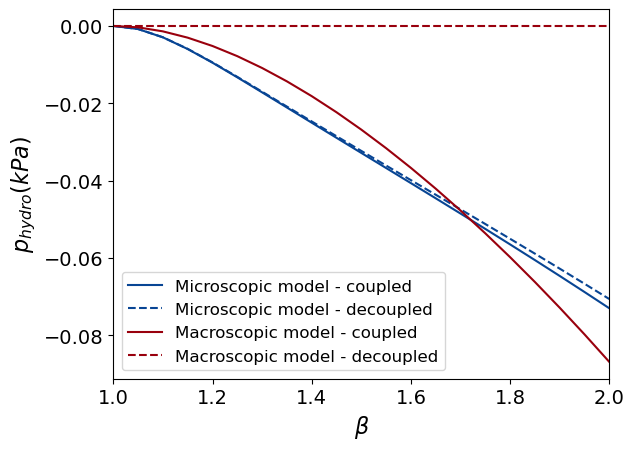

In [19]:
plt.figure()
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=12)
plt.xlabel(r'$\beta$', fontsize=16)
plt.ylabel(r'$p_{hydro} (kPa)$', fontsize=16)

plt.plot(beta_lst, p_lst_micro_c, '#084594')
plt.plot(beta_lst, p_lst_micro_d, '#084594', linestyle='dashed')

plt.plot(beta_lst, p_lst_macro_c, '#99000D')
plt.plot(beta_lst, p_lst_macro_d, '#99000D', linestyle='dashed')


plt.legend(['Microscopic model - coupled', 'Microscopic model - decoupled', 'Macroscopic model - coupled', 'Macroscopic model - decoupled'])
plt.xlim(1, 2)
# plt.ylim(-.05, 0.001)
# plt.savefig('p_hydro.pdf',bbox_inches='tight')
plt.show()

# Frequency Distribution

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Hydrostatic pressure (kPa)')

Text(0, 0.5, 'Frequency distribution')

<AxesSubplot:xlabel='Hydrostatic pressure (kPa)', ylabel='Frequency distribution'>

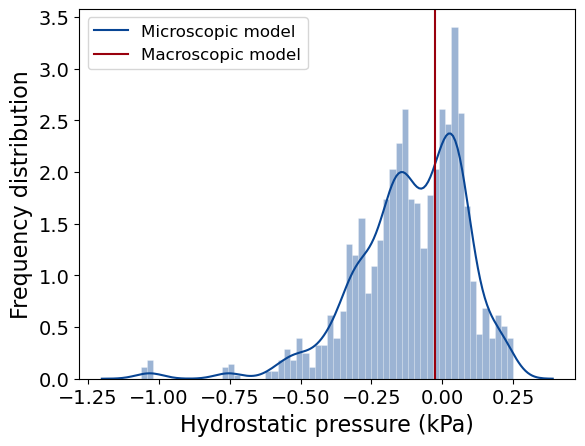

In [20]:
pf_ = 0.
beta_ = 1.5

data_dist_micro =  global_response(mesh=mesh, mat_params=mat_params, eps_xx=beta_-1, eps_yy=1/beta_-1, pf=pf_, sigma_bar=sigma_bar, foi_name='p_hydro')[1]
data_macro = p_c_shear.subs(beta, beta_).subs(subs_dict).subs(p_f, pf_)

plt.figure()
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=12)        
plt.xlabel('Hydrostatic pressure (kPa)', fontsize=16)
# plt.xlabel('Von Mises stress (kPa)', fontsize=16)
plt.ylabel('Frequency distribution', fontsize=16)

sns.histplot(data_dist_micro, bins=60, kde=True, color = '#084594',
        stat="density", kde_kws=dict(cut=3),
        alpha=0.4, edgecolor=(1, 1, 1, .4))
plt.axvline(x = data_macro, color = '#99000D', label = 'axvline - full height')
plt.legend(['Microscopic model', 'Macroscopic model'])

# sns.histplot(data=data, bins=100, log_scale=True, element="step", fill=False, stat="density")
# plt.xlim(1, 2)
# plt.ylim(-.05, 0.001)
plt.savefig('p_hydro_density_P00.pdf',bbox_inches='tight')
# plt.savefig('Sigma_VM_density_P02.pdf',bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Hydrostatic pressure (kPa)')

Text(0, 0.5, 'Frequency distribution')

<AxesSubplot:xlabel='Hydrostatic pressure (kPa)', ylabel='Frequency distribution'>

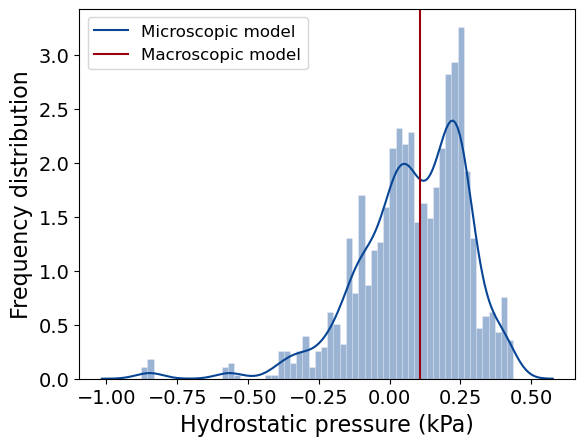

In [21]:
pf_ = 0.2
beta_ = 1.5

data_dist_micro =  global_response(mesh=mesh, mat_params=mat_params, eps_xx=beta_-1, eps_yy=1/beta_-1, pf=pf_, sigma_bar=sigma_bar, foi_name='p_hydro')[1]
data_macro = p_c_shear.subs(beta, beta_).subs(subs_dict).subs(p_f, pf_)

plt.figure()
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=12)        
plt.xlabel('Hydrostatic pressure (kPa)', fontsize=16)
# plt.xlabel('Von Mises stress (kPa)', fontsize=16)
plt.ylabel('Frequency distribution', fontsize=16)

sns.histplot(data_dist_micro, bins=60, kde=True, color = '#084594',
        stat="density", kde_kws=dict(cut=3),
        alpha=0.4, edgecolor=(1, 1, 1, .4))
plt.axvline(x = data_macro, color = '#99000D', label = 'axvline - full height')
plt.legend(['Microscopic model', 'Macroscopic model'])

# sns.histplot(data=data, bins=100, log_scale=True, element="step", fill=False, stat="density")
# plt.xlim(1, 2)
# plt.ylim(-.05, 0.001)
plt.savefig('p_hydro_density_P02.pdf',bbox_inches='tight')
# plt.savefig('Sigma_VM_density_P02.pdf',bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Von Mises stress (kPa)')

Text(0, 0.5, 'Frequency distribution')

<AxesSubplot:xlabel='Von Mises stress (kPa)', ylabel='Frequency distribution'>

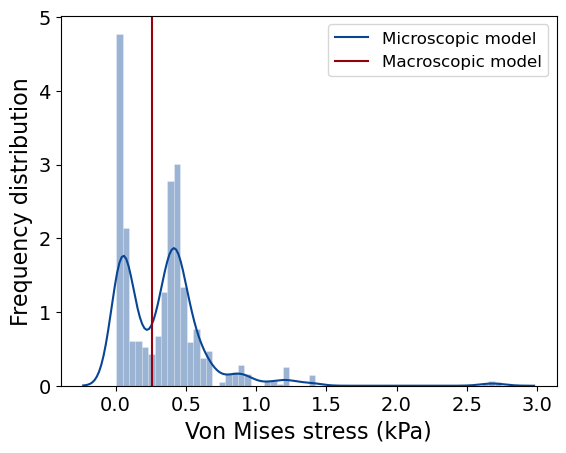

In [22]:
pf_ = 0.
beta_ = 1.5

data_dist_micro =  global_response(mesh=mesh, mat_params=mat_params, eps_xx=beta_-1, eps_yy=1/beta_-1, pf=pf_, sigma_bar=sigma_bar, foi_name='Sigma_VM')[1]
data_macro = Sigma_c_VM.subs(beta, beta_).subs(subs_dict).subs(p_f, pf_).simplify()

plt.figure()
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=12)        

plt.xlabel('Von Mises stress (kPa)', fontsize=16)
plt.ylabel('Frequency distribution', fontsize=16)

sns.histplot(data_dist_micro, bins=60, kde=True, color = '#084594',
        stat="density", kde_kws=dict(cut=3),
        alpha=0.4, edgecolor=(1, 1, 1, .4))
plt.axvline(x = data_macro, color = '#99000D', label = 'axvline - full height')
plt.legend(['Microscopic model', 'Macroscopic model'])

# sns.histplot(data=data, bins=100, log_scale=True, element="step", fill=False, stat="density")
# plt.xlim(1, 2)
# plt.ylim(-.05, 0.001)

plt.savefig('Sigma_VM_density_P00.pdf',bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Von Mises stress (kPa)')

Text(0, 0.5, 'Frequency distribution')

<AxesSubplot:xlabel='Von Mises stress (kPa)', ylabel='Frequency distribution'>

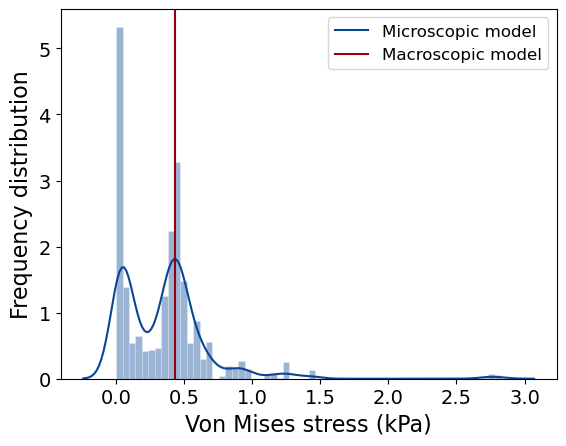

In [23]:
pf_ = 0.2
beta_ = 1.5

data_dist_micro =  global_response(mesh=mesh, mat_params=mat_params, eps_xx=beta_-1, eps_yy=1/beta_-1, pf=pf_, sigma_bar=sigma_bar, foi_name='Sigma_VM')[1]
data_macro = Sigma_c_VM.subs(beta, beta_).subs(subs_dict).subs(p_f, pf_).simplify()

plt.figure()
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=12)        

plt.xlabel('Von Mises stress (kPa)', fontsize=16)
plt.ylabel('Frequency distribution', fontsize=16)

sns.histplot(data_dist_micro, bins=60, kde=True, color = '#084594',
        stat="density", kde_kws=dict(cut=3),
        alpha=0.4, edgecolor=(1, 1, 1, .4))
plt.axvline(x = data_macro, color = '#99000D', label = 'axvline - full height')
plt.legend(['Microscopic model', 'Macroscopic model'])

# sns.histplot(data=data, bins=100, log_scale=True, element="step", fill=False, stat="density")
# plt.xlim(1, 2)
# plt.ylim(-.05, 0.001)

plt.savefig('Sigma_VM_density_P02.pdf',bbox_inches='tight')
plt.show()

In [97]:
mode = 'p_hydro'
# mode = 'Sigma_VM'
# pressure = True
# pressure = False
pf_ = 0.
beta_ = 1.5

data_dist_micro =  global_response(mesh=mesh, mat_params=mat_params, eps_xx=beta_-1, eps_yy=1/beta_-1, pf=pf_, sigma_bar=sigma_bar, foi_name=mode)[1]

if mode == 'p_hydro':
    data_macro = p_c_shear.subs(beta, beta_).subs(subs_dict).subs(p_f, pf_)
else:
    data_macro = Sigma_c_VM.subs(beta, beta_).subs(subs_dict).subs(p_f, pf_).simplify()

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Hydrostatic pressure (kPa)')

Text(0, 0.5, 'Frequency distribution')

<AxesSubplot:xlabel='Hydrostatic pressure (kPa)', ylabel='Frequency distribution'>

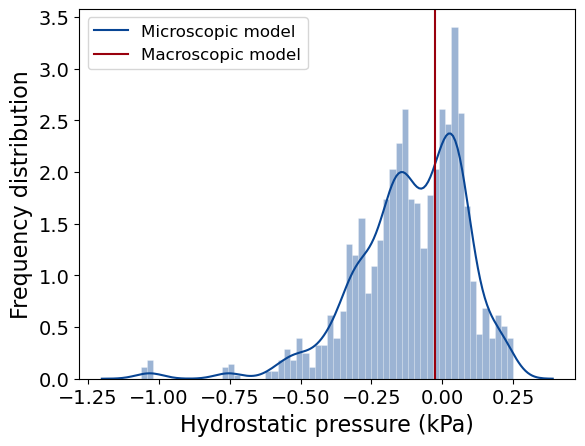

In [98]:
plt.figure()
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=12)        
plt.xlabel('Hydrostatic pressure (kPa)', fontsize=16)
# plt.xlabel('Von Mises stress (kPa)', fontsize=16)
plt.ylabel('Frequency distribution', fontsize=16)

sns.histplot(data_dist_micro, bins=60, kde=True, color = '#084594',
        stat="density", kde_kws=dict(cut=3),
        alpha=0.4, edgecolor=(1, 1, 1, .4))
plt.axvline(x = data_macro, color = '#99000D', label = 'axvline - full height')
plt.legend(['Microscopic model', 'Macroscopic model'])

# sns.histplot(data=data, bins=100, log_scale=True, element="step", fill=False, stat="density")
# plt.xlim(1, 2)
# plt.ylim(-.05, 0.001)
plt.savefig('p_hydro_density_P00.pdf',bbox_inches='tight')
# plt.savefig('Sigma_VM_density_P02.pdf',bbox_inches='tight')
plt.show()
